In [113]:
#Import the required libraries
import numpy as np
import util

In [114]:
#Create a class for Logistic regression
class LogisticRegression:
    
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
        self.step_size=0.01
        self.alpha=0.0001
        self.max_iter=1000000 
        self.eps=1e-5
        self.theta_0=None
        
        
    #Hypothesis Function
    def hypothesisFunc(self, x, theta):
        
        #Calculate z
        z = np.dot(x, theta)

        #Calculate sigmoid
        sigmoid = 1.0 / (1.0 + np.exp(-z)) 
        
        return sigmoid
        
    #Gradient Descent
    def gradientDescent(self):
        
        #Initialize theta as all 0's
        self.theta = np.zeros(self.x.shape[1])
        
        #Initialize check and iter_count
        check = True
        iter_count = 0

        #Loop till the algorithm converges or iter < max_iter
        while check and iter_count < self.max_iter:
            
            #Update iter_count
            iter_count += 1
            
            #Update old_theta
            old_theta = self.theta
            

            #Perform the gradient descent update on theta using Vectorized code
            #1. Vectorized code
            #Comment / Uncomment either of vectorized / non-vectorized code to see the time difference in execution of both the codes
            self.theta = self.theta + self.alpha * np.matmul(self.x.T,(self.y - self.hypothesisFunc(self.x, self.theta)))            
            
            #Perform the gradient descent update on theta using Non-Vectorized code
            #2. Non-Vectorized code (Commented out)
#             for i in range(self.x.shape[0]):
#                 self.theta = self.theta + self.alpha * self.x[i,:].T*(self.y[i,] - self.hypothesisFunc(self.x[i,:],self.theta))
                        
            #Difference between new and old theta
            diff = np.linalg.norm(self.theta - old_theta)
                        
            #Check if the difference is less than the eps specified
            if abs(diff) < self.eps:
                check = False
                print("Algorithm has converged after {}  iterations".format(iter_count))
     
    #Newton Method
    def newtonMethod(self):
        
        #Initialize theta as all 0's
        self.theta = np.zeros(self.x.shape[1])
        
        #Initialize check and iter_count
        check = True
        iter_count = 0
        
        #Loop till the algorithm converges or iter < max_iter
        while check and iter_count < self.max_iter:
            
            #Update iter_count
            iter_count += 1
            
            #Update old_theta
            old_theta = self.theta
            
            #Calculate the first derivative of the log likelihood function wrt theta
            Der1 = np.matmul(self.x.T,(self.y - self.hypothesisFunc(self.x, self.theta))) 
            
            #Calculate the second derivative
            sigmoid = self.hypothesisFunc(self.x, self.theta)
            k = np.array([a*b for (a,b) in zip(self.x, sigmoid*(1-sigmoid))])
            Der2 =  -1*np.dot(k.T,self.x)
            
            #Calculate the new theta using Newton's Method
            self.theta = old_theta - np.dot(Der1, np.linalg.inv(Der2))
            
            #Difference between new and old theta
            diff = np.linalg.norm(self.theta - old_theta)
            
            #Check if the difference is less than the eps specified
            if abs(diff) < self.eps:
                check = False
                print("Algorithm has converged after {}  iterations".format(iter_count))
        

    #Predict function
    def predict(self, x):
        
        z = np.dot(x, self.theta)
        return 1.0 / (1.0 + np.exp(-z)) 
            

In [115]:
#Load the dataset
#Specify path of the training dataset in util.load_dataset
x_train, y_train = util.load_dataset('ds1_train.csv', add_intercept=True)

In [116]:
#Create an object of the class
myLogisticReg = LogisticRegression(x_train,y_train)

### Use Gradient Descent for finding theta

In [117]:
#Perform Gradient Descent
myLogisticReg.gradientDescent()

Algorithm has converged after 2402  iterations


Logistic Regression Algorithm got Accuracy of: 0.83


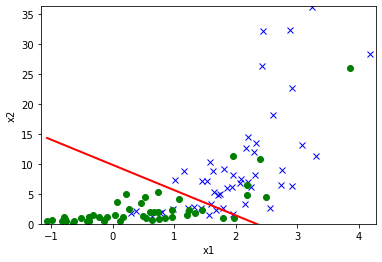

In [118]:
# Plot decision boundary on top of validation set set
x_eval, y_eval = util.load_dataset('ds1_valid.csv', add_intercept=True)

save_path='logreg_pred_1.txt'
plot_path = save_path.replace('.txt', '.png')
util.plot(x_eval, y_eval, myLogisticReg.theta, plot_path)

# Use np.savetxt to save predictions on eval set to save_path
p_eval = myLogisticReg.predict(x_eval)
yhat = p_eval > 0.5
print('Logistic Regression Algorithm got Accuracy of: %.2f' % np.mean( (yhat == 1) == (y_eval == 1)))
np.savetxt(save_path, p_eval)

In [119]:
print("This is theta: ", myLogisticReg.theta)

This is theta:  [-2.40502032  1.03229712  0.24470841]


### Use Newton Method for finding theta

In [120]:
#Perform Newton Method
myLogisticReg.newtonMethod()

Algorithm has converged after 7  iterations


Logistic Regression Algorithm got Accuracy of: 0.83


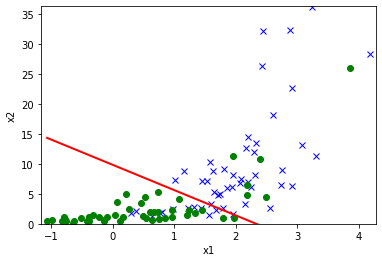

In [121]:
# Plot decision boundary on top of validation set set
x_eval, y_eval = util.load_dataset('ds1_valid.csv', add_intercept=True)

save_path='logreg_pred_1.txt'
plot_path = save_path.replace('.txt', '.png')
util.plot(x_eval, y_eval, myLogisticReg.theta, plot_path)

# Use np.savetxt to save predictions on eval set to save_path
p_eval = myLogisticReg.predict(x_eval)
yhat = p_eval > 0.5
print('Logistic Regression Algorithm got Accuracy of: %.2f' % np.mean( (yhat == 1) == (y_eval == 1)))
np.savetxt(save_path, p_eval)

In [122]:
print("This is theta: ", myLogisticReg.theta)

This is theta:  [-2.40859977  1.03437317  0.24480705]
